In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
def drawGraph (G, pos = None):
    plt.figure (figsize=(15,15))
    if not pos:
        pos = nx.spring_layout(G)
    nx.draw(G, pos)
    nx.draw_networkx_labels(G, pos) 
    plt.show()

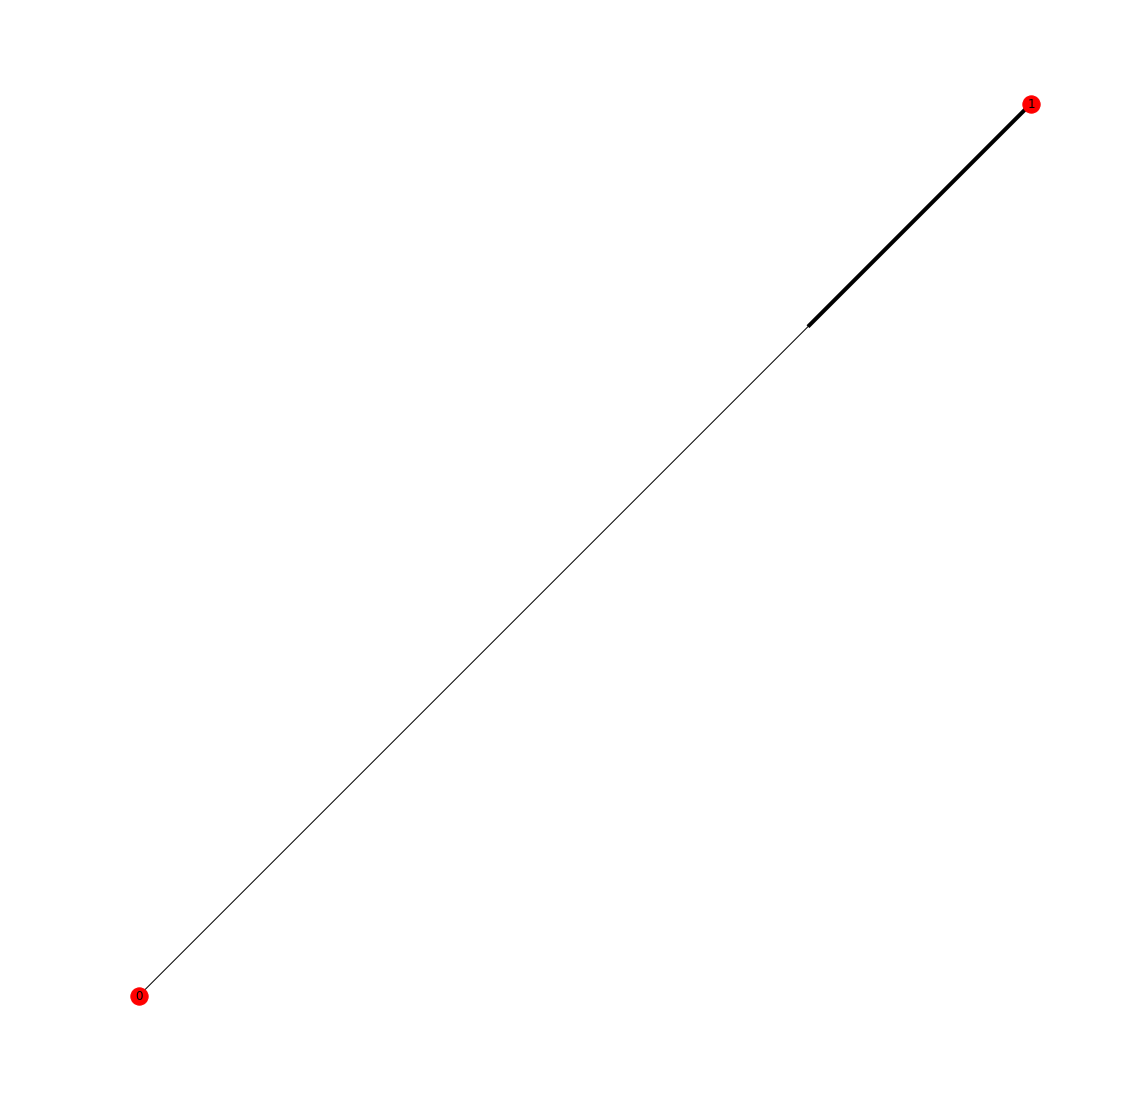

[[0 1]
 [0 0]]


In [3]:
# 2.a
G = nx.DiGraph ()
G.add_edge (0,1)
drawGraph (G)
print (nx.adjacency_matrix (G).todense())

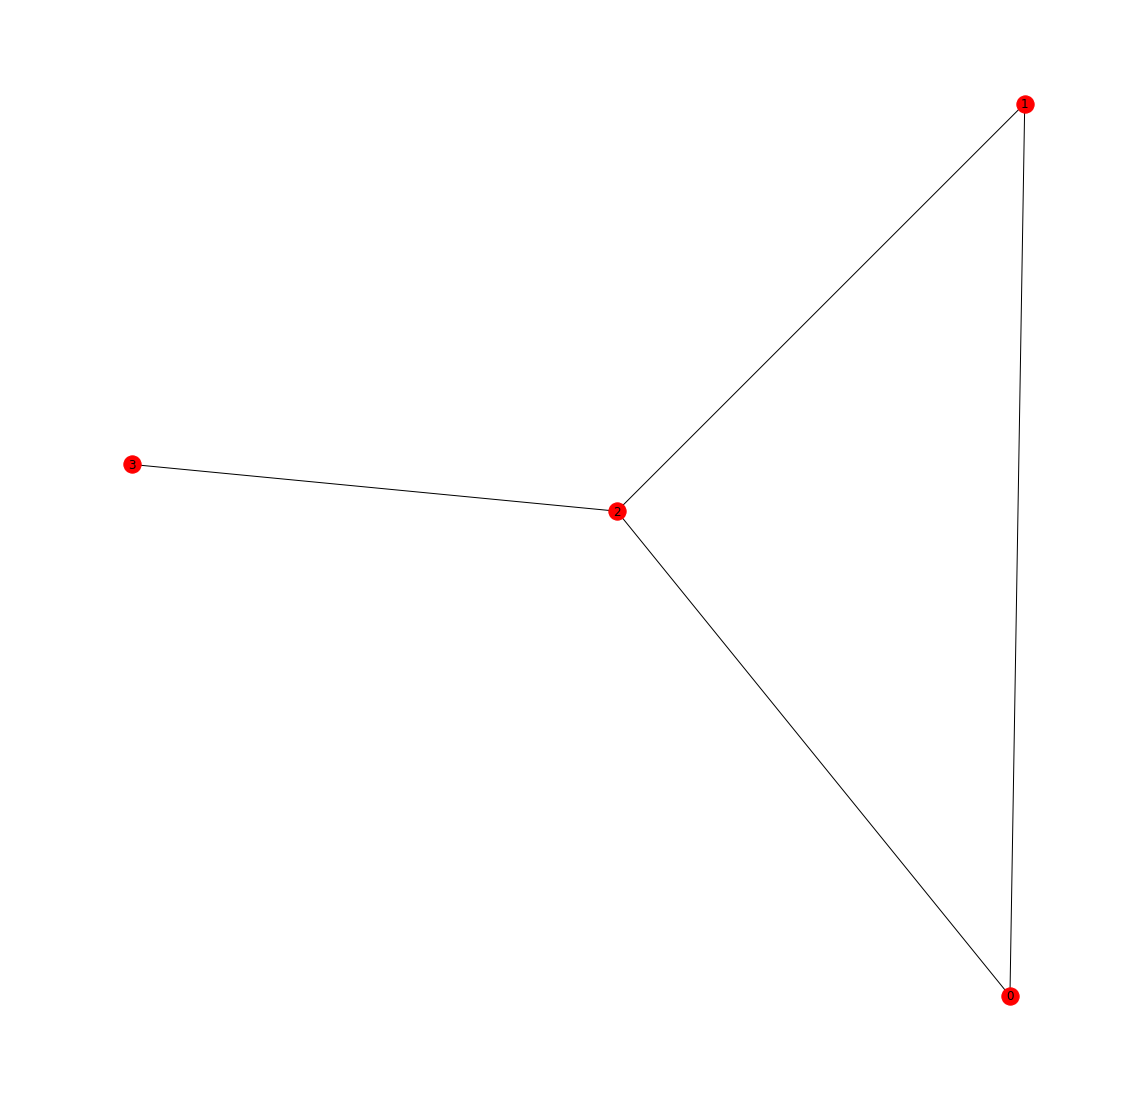

local clustering: {0: 1.0, 1: 1.0, 2: 0.3333333333333333, 3: 0}
mean local clustering: 0.5833333333333334
global clustering = 3 / 5 =  0.6
[[0 1 1 0]
 [1 0 1 0]
 [1 1 0 1]
 [0 0 1 0]]


In [4]:
# 3
G = nx.Graph ()
G.add_edge (0,1)
G.add_edge (0,2)
G.add_edge (2,1)
G.add_edge (2,3)
drawGraph (G)

print ('local clustering:', nx.clustering (G))
print ('mean local clustering:', nx.average_clustering (G))
print ('global clustering = 3 / 5 = ', 3.0 / 5 )

print (nx.adjacency_matrix(G).todense ())

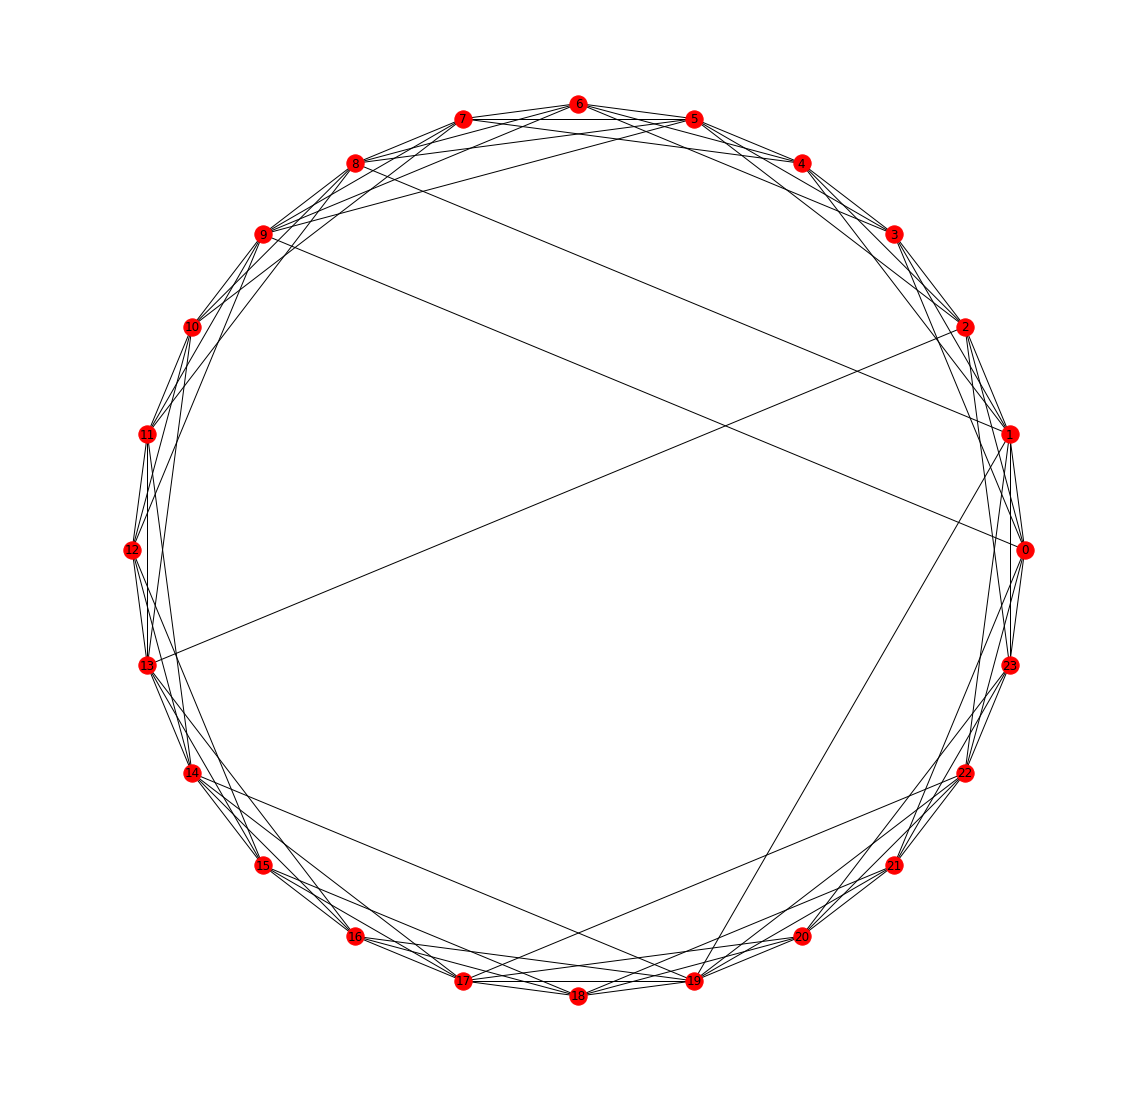

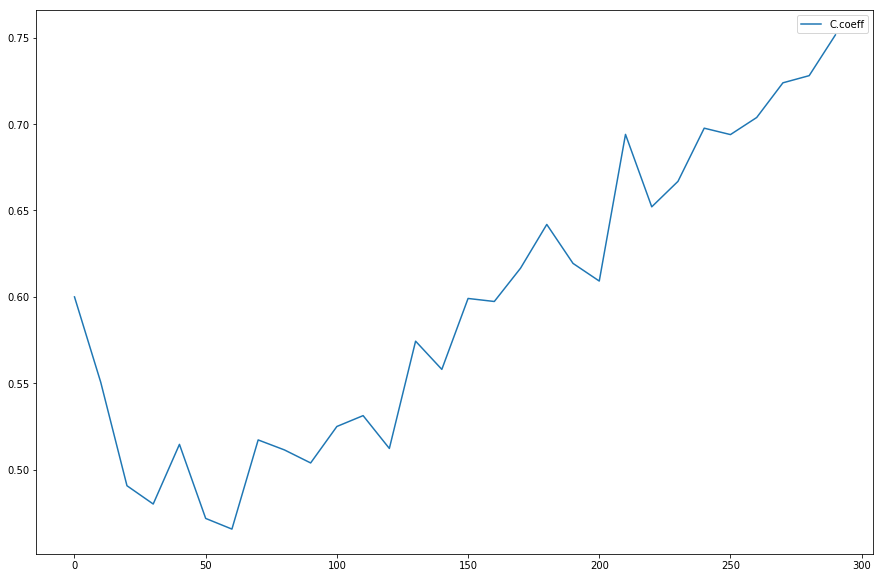

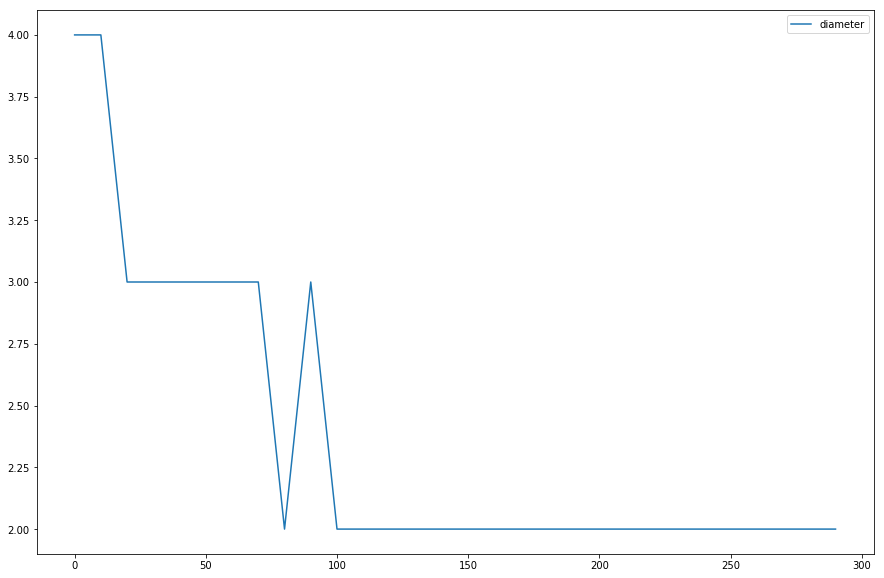

In [5]:
# ex. IV.4
import random


def genPair (nodesNumber):
    fr = random.randint (0, nodesNumber - 1)
    to = random.randint (0, nodesNumber - 1)
    if fr == to:
        return genPair (nodesNumber)
    return fr,to
    
def modelC (nodesNumber, k, shortcutsNumber, withoutDuplicates):
    G = nx.Graph ()
    for i in range (nodesNumber):
        for j in range (i + 1, i + k + 1):
            G.add_edge (i, j % nodesNumber)
    for i in range (shortcutsNumber):
        fr,to = genPair (nodesNumber)
        while withoutDuplicates and G.has_edge (fr, to):
            fr,to = genPair (nodesNumber)
        G.add_edge (fr, to)
            
    return G

N = 24
k = 3

G = modelC (N, k, 7, True)
drawGraph (G, pos = nx.circular_layout (G))


cc = []
diam = []
xs = []
for i in range (0, 300, 10):
    G = modelC (N, k, i, False)
    xs.append (i)
    cc.append (nx.average_clustering(G))
    diam.append (nx.diameter (G))

plt.figure(figsize=(15,10))
plt.plot (xs, cc, label='C.coeff')
plt.legend ()
plt.show ()

plt.figure(figsize=(15,10))
plt.plot (xs, diam, label='diameter')
plt.legend ()
plt.show ()
               
    

198 2742


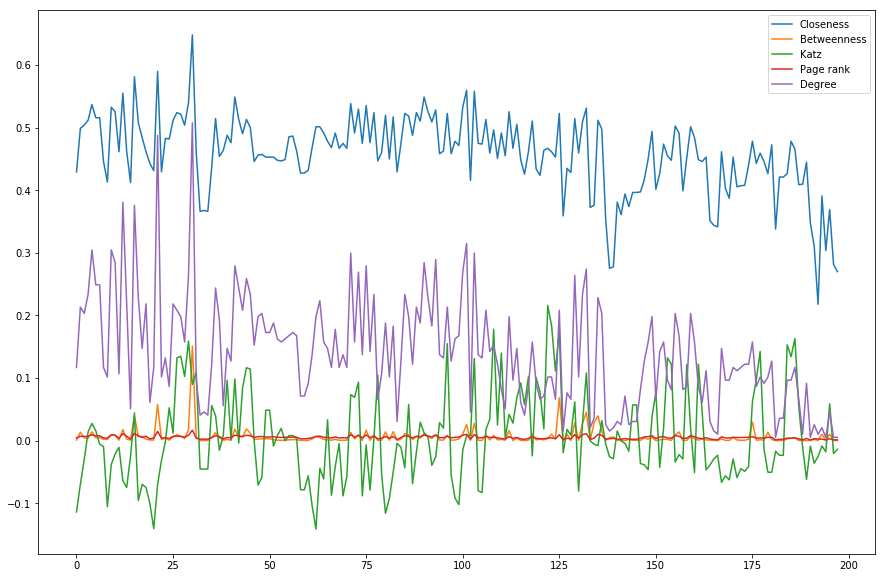




Closeness  vs  Betweenness : PearsonResult (0.47453331814710198, 1.6342620068503779e-12) SpearmanrResult(correlation=0.72963494651647565, pvalue=3.4748583202142741e-34)

Closeness  vs  Katz : PearsonResult (0.20478477202502932, 0.0038028695869660642) SpearmanrResult(correlation=0.19996111687774332, pvalue=0.0047358944468740578)

Closeness  vs  Page rank : PearsonResult (0.81043643555241907, 2.1288197004115935e-47) SpearmanrResult(correlation=0.85371421640700862, pvalue=1.9104414131852704e-57)

Closeness  vs  Degree : PearsonResult (0.8587106972182641, 8.2053924646467667e-59) SpearmanrResult(correlation=0.88997581830868899, pvalue=9.2014566118425372e-69)



Betweenness  vs  Katz : PearsonResult (0.21051726142770574, 0.0029116166993238524) SpearmanrResult(correlation=0.22927126443390083, pvalue=0.0011577248443293644)

Betweenness  vs  Page rank : PearsonResult (0.69085919919951577, 2.0107034333430899e-29) SpearmanrResult(correlation=0.80632545889295659, pvalue=1.401819470322234e-46)



In [9]:
# ex. IV.5

def graphFromEdgesFile (fname):
    G = nx.read_edgelist (fname, delimiter = '\t')
    print(len (G.nodes ()), len (G.edges ()))
    return G

# http://konect.uni-koblenz.de/networks/arenas-jazz
Gj = graphFromEdgesFile ('../datasets/arenas-jazz.tsv')

clC = nx.closeness_centrality (Gj)
bC = nx.betweenness_centrality (Gj)
kC = nx.katz_centrality_numpy (Gj)
prC = nx.pagerank (Gj)
degC = nx.degree_centrality (Gj)

keys = Gj.nodes ()
correlations = [[clC[k] for k in keys], [bC[k] for k in keys], [kC[k] for k in keys], [prC[k] for k in keys], [degC[k] for k in keys]]
names = ['Closeness', 'Betweenness', 'Katz', 'Page rank', 'Degree']


plt.figure (figsize=(15,10))
for i in range (5):
    plt.plot (correlations[i], label = names[i])
plt.legend ()
plt.show ()

from scipy import stats


for i in range (5):
    print('\n')
    for j in range (i + 1, 5):
        print('\n' + names[i], ' vs ', names[j], ': PearsonResult', stats.pearsonr (correlations[i], correlations[j]), stats.spearmanr (correlations[i], correlations[j]))